# Hierarchical Clustering - Ejercicio - Wine

**Contexto**  
Este conjunto de datos contiene el detalle del análisis químico de vinos creados en la misma región de Italia, pertenecientes a 3 fabricantes diferentes. Los vinos se encuentran clasificados en 3 clases.

**Contenido**  
El conjunto de datos proviene de scikit-learn.  
Contiene 178 renglones con las siguientes columnas:  

| Variable                     | Definición              | Valor    |
| ---------------------------- | ----------------------- | -------- |
| alcohol                      |                         | Numérico |
| malic_acid                   |                         | Numérico |
| ash                          |                         | Numérico |
| alcalinity_of_ash            |                         | Numérico |
| magnesium                    |                         | Numérico |
| total_phenols                |                         | Numérico |
| flavanoids                   |                         | Numérico |
| nonflavanoid_phenols         |                         | Numérico |
| proanthocyanins              |                         | Numérico |
| color_intensity              |                         | Numérico |
| hue                          |                         | Numérico |
| od280/od315_of_diluted_wines |                         | Numérico |
| proline                      |                         | Numérico |
| target                       | **(variable objetivo)** | 0, 1, 2  |

**Planteamiento del problema**  
Se busca predecir la clase de vino, de acuerdo sus las características.

**Nota:** este conjunto de datos es para problemas de clasificación, dado que contamos con las etiquetas.  
Lo usaremos para clustering, solo para efectos ilustrativos, comparando loas resultados del modelo contra las etiquetas

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Cargar Datos

In [2]:
# Importar los datos
wine = load_wine(as_frame=True)
X = wine.data
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
y = wine.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [4]:
y1 = y.to_frame()
df = pd.concat([X.reset_index(drop=True), y1.reset_index(drop=True)], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Normalización

In [5]:
# Variables independientes
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
# Normalizar
scaler = StandardScaler()
X_adj = scaler.fit_transform(X)
print(X_adj)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [7]:
# Variable dependiente
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [8]:
print('X:', len(X_adj), 'y:', len(y))

X: 178 y: 178


## Modelado

In [ ]:
# Entrenamiento
## Escribe tu código aqui

AgglomerativeClustering(n_clusters=3)

In [ ]:
# Resultados
## Escribe tu código aqui

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

## Visualizacion

In [11]:
Z = linkage(df, "ward")

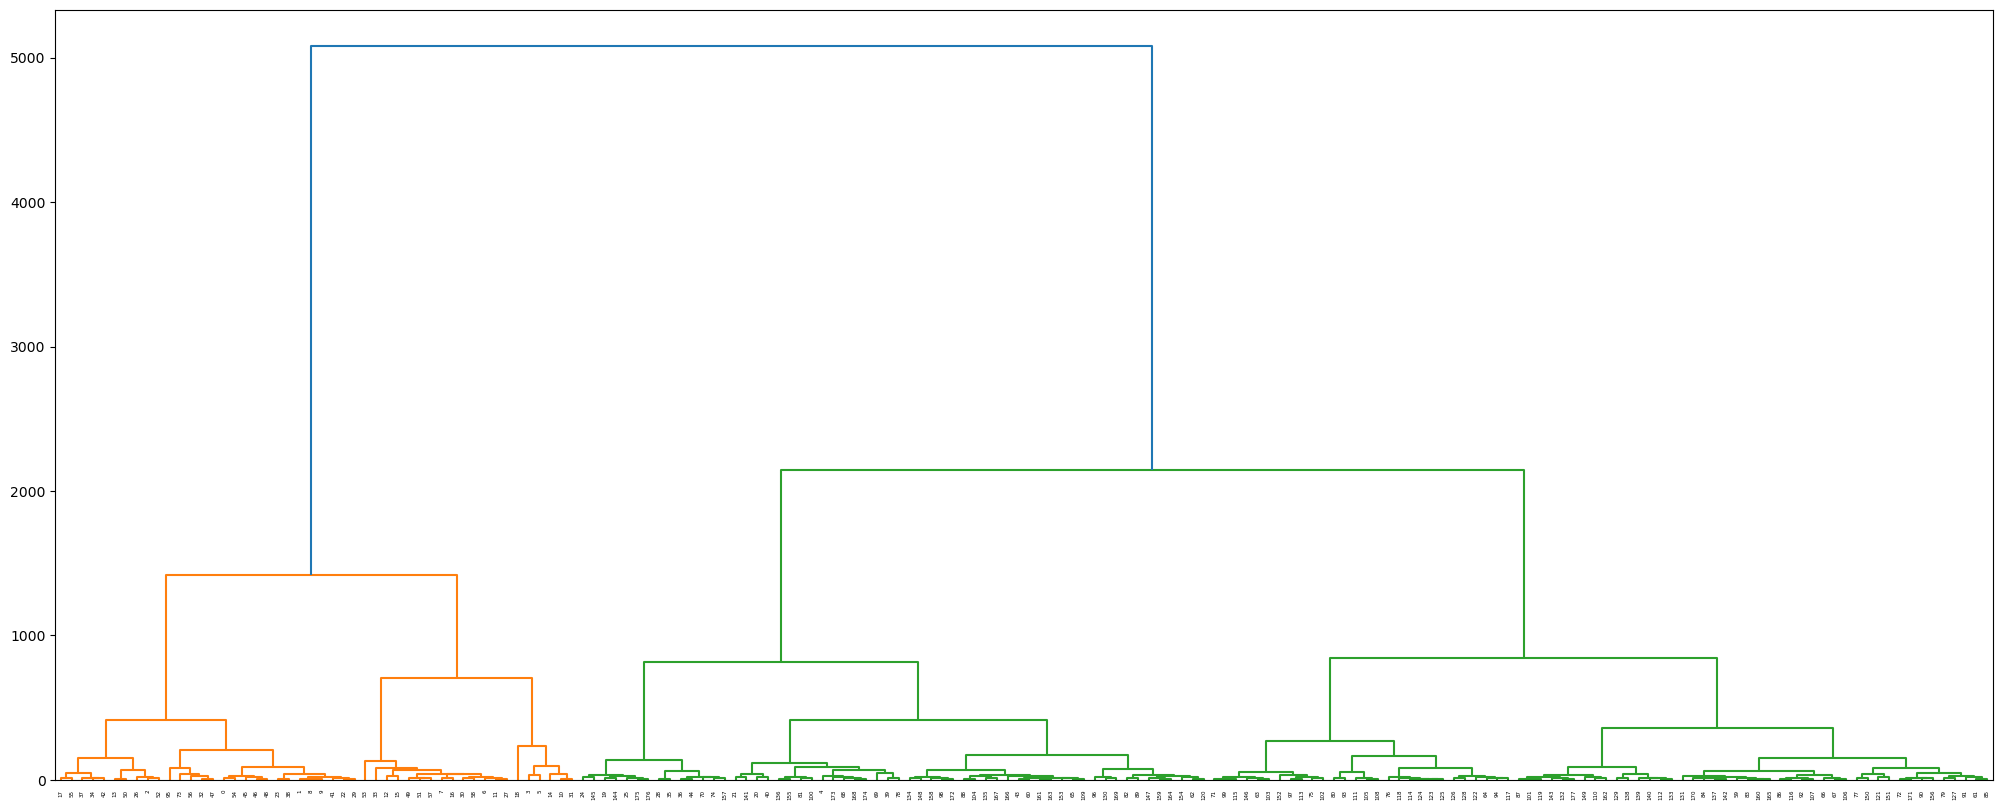

In [12]:
plt.figure(figsize=(25,10))
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()